In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as snp

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
def find_and_fill_missing_values(data):
    for column in data:
        if data[column].isnull().sum() != 0:
            if data[column].dtype == 'object':
                data[column].fillna(data[column].mode()[0], inplace=True)
            else:
                data[column].fillna(data[column].median(), inplace=True)
    return(data)

In [6]:
df = find_and_fill_missing_values(df)

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

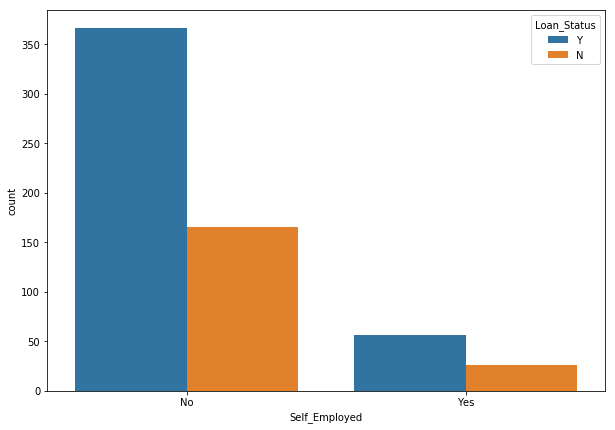

In [12]:
plt.figure(figsize=(10,7))
snp.countplot(df['Self_Employed'], hue=df['Loan_Status'])

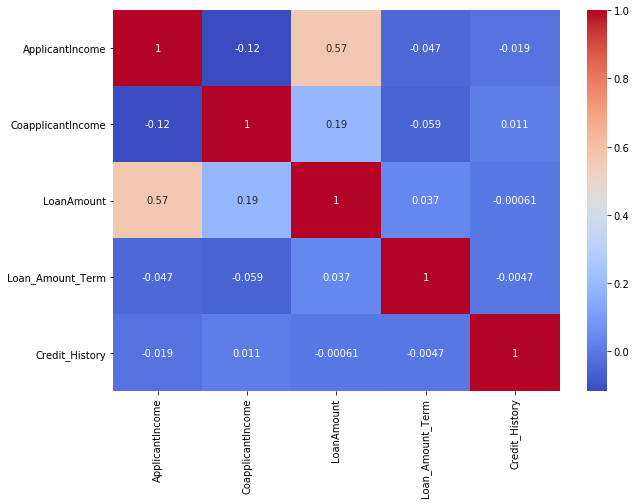

In [20]:
plt.figure(figsize=(10,7))
snp.heatmap(df.corr(), annot=True, cmap='coolwarm')

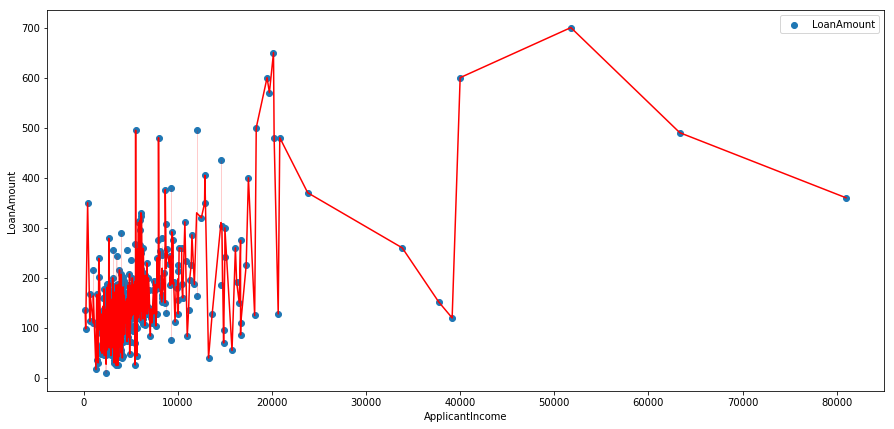

In [40]:
plt.figure(figsize=(15,7))
plt.scatter(x='ApplicantIncome', y='LoanAmount', data=df, marker='o')
snp.lineplot(x='ApplicantIncome', y='LoanAmount', data=df, color='r')

In [ ]:
def dummy_conversion(data):
    for field in data.iloc[:, 1:-1]:
        if data[field].dtype == 'object':
            temp = pd.get_dummies(data[field], drop_first=True)
            data = pd.concat([data, temp], axis=1)
    return(data)

In [ ]:
df = dummy_conversion(df)

In [ ]:
df.drop(['Property_Area', 'Education','Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], axis=1, inplace=True)

In [ ]:
df.head(5)